In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline
print('Successful')

Successful


In [3]:
data=pd.read_csv('stretch_exercise_dataset new.csv')
data.head(5)

,Exercise Name,Equipment,Preparation,Execution,Target_Muscles,Synergist_Muscles,Main_muscle
0,Retraction​​​​​​​,Stretch,Stand or sit.,Pull head back as far possible while looking s...,"Longus colli,","Splenius, Trapezius, Upper, Erector Spinae, Ce...",Neck
1,Neck Extensor,Stretch,Bow head forward with jaw shut. Depress chin i...,Slightly turn head to one side. Hold stretch. ...,"Splenius,","Trapezius, Upper (Part 1), Erector Spinae, Cer...",Neck
2,Doorway,Stretch,0,0,"Deltoid, Anterior,","Pectoralis Major, Sternal, Pectoralis Major, C...",Shoulder
3,Wall,Stretch,0,0,"Deltoid, Anterior,","Pectoralis Major, Sternal, Pectoralis Major, C...",Shoulder
4,Side Deltoid,Stretch,0,0,"Deltoid, Lateral,","Infraspinatus, Teres Minor, Trapezius, Middle,...",Shoulder


In [5]:
data.describe()

,Exercise Name,Equipment,Preparation,Execution,Target_Muscles,Synergist_Muscles,Main_muscle
count,94,94,94,94,93,94,94
unique,64,9,84,82,35,31,9
top,Lever,Stretch,0,0,Hamstrings,0,Thighs
freq,7,72,6,6,9,41,27


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Exercise Name      94 non-null     object
 1   Equipment          94 non-null     object
 2   Preparation        94 non-null     object
 3   Execution          94 non-null     object
 4   Target_Muscles     93 non-null     object
 5   Synergist_Muscles  94 non-null     object
 6   Main_muscle        94 non-null     object
dtypes: object(7)
memory usage: 5.3+ KB


In [8]:
data.nunique()

Exercise Name        64
Equipment             9
Preparation          84
Execution            82
Target_Muscles       35
Synergist_Muscles    31
Main_muscle           9
dtype: int64

In [9]:
data.isnull().sum()

Exercise Name        0
Equipment            0
Preparation          0
Execution            0
Target_Muscles       1
Synergist_Muscles    0
Main_muscle          0
dtype: int64

In [14]:
data.dropna(subset=['Target_Muscles'], inplace=True)

In [15]:
data.isnull().sum()

Exercise Name        0
Equipment            0
Preparation          0
Execution            0
Target_Muscles       0
Synergist_Muscles    0
Main_muscle          0
dtype: int64

In [16]:
data.duplicated().sum()

0

In [19]:
columns=data.columns
columns

Index(['Exercise Name', 'Equipment', 'Preparation', 'Execution',
       'Target_Muscles', 'Synergist_Muscles', 'Main_muscle'],
      dtype='object')

In [21]:

data.shape

(93, 7)

#### <span style='color:Green'>To get a desired or random sample of any size we use this </span>

In [23]:
data.sample(5)

,Exercise Name,Equipment,Preparation,Execution,Target_Muscles,Synergist_Muscles,Main_muscle
77,Seated Groin: Lever,Stretch,Sit on apparatus with each leg on adjacent pla...,Separate legs apart by turning knob. Lean forw...,"Adductors, Hip",0,Thighs
48,Bentover Lunging,Stretch (Iliopsoas),Kneel down and position one leg extended behin...,Straighten hip of rear leg by pushing hips dow...,"Iliopsoas,","Gluteus Maximus, Adductor Magnus, Soleus,",Hips
56,Seated Piriformis Stretch (chair or bench),Stretch (Piriformis),Sit on chair of bench with feet on floor and k...,Lean forward pulling body toward legs. Hold st...,"Piriformis, Quadratus Femoris,","Erector Spinae,",Hips
92,Kneeling,Stretch,Kneel on both knees with buttocks over both he...,Sit down on or toward heels. Hold stretch.,"Tibialis Anterior,","Quadriceps,",Calves
41,Lying Crossover,Stretch (Gluteus Medius & Minimus),"On floor or mat, lie supine with arms extended...",Lower leg to opposite side toward hand. Hold s...,"Gluteus Medius, Gluteus Minimus,","Obliques, Erector Spinae,",Hips


# <span style='color:Red'>Data Cleaning</span>
## <span style='color:Green'>Identifying Outliers using Z-Score</span>

In [37]:
from scipy import stats
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

z_scores=stats.zscore(numerical_cols)

outliers = (z_scores > 3).any(axis=1) | (z_scores <-3).any(axis=1)
data_outliers = data[outliers]
print(f"Number of outliers row: {data_outliers.shape[0]}")

Number of outliers row: 0


## <span style='color:Red'>In Depth Analysis</span>

In [38]:
data.head(5)

,Exercise Name,Equipment,Preparation,Execution,Target_Muscles,Synergist_Muscles,Main_muscle
0,Retraction​​​​​​​,Stretch,Stand or sit.,Pull head back as far possible while looking s...,"Longus colli,","Splenius, Trapezius, Upper, Erector Spinae, Ce...",Neck
1,Neck Extensor,Stretch,Bow head forward with jaw shut. Depress chin i...,Slightly turn head to one side. Hold stretch. ...,"Splenius,","Trapezius, Upper (Part 1), Erector Spinae, Cer...",Neck
2,Doorway,Stretch,0,0,"Deltoid, Anterior,","Pectoralis Major, Sternal, Pectoralis Major, C...",Shoulder
3,Wall,Stretch,0,0,"Deltoid, Anterior,","Pectoralis Major, Sternal, Pectoralis Major, C...",Shoulder
4,Side Deltoid,Stretch,0,0,"Deltoid, Lateral,","Infraspinatus, Teres Minor, Trapezius, Middle,...",Shoulder


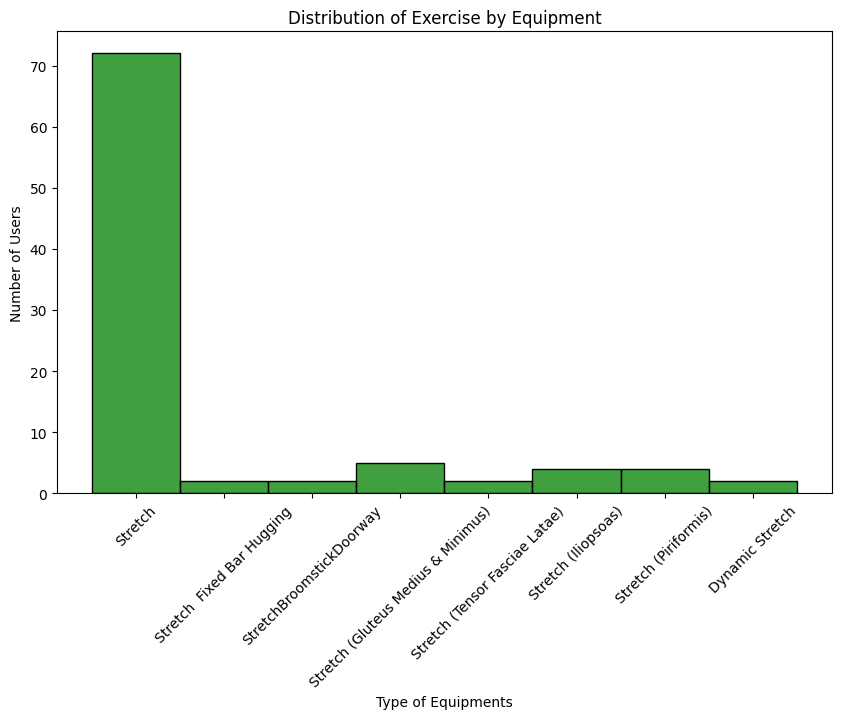

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Equipment', color='Green')
plt.title('Distribution of Exercise by Equipment')
plt.xlabel('Type of Equipments')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

## <span style='color:Pink'>Insight to Type of Equipments</span>
So from the figure we can see that 
1. The highest number of equiment used is **Stretch**
2. The lowest number of equipment used is **Stretch Fixed Bar Hugging** and **Dynamic Stretch** 

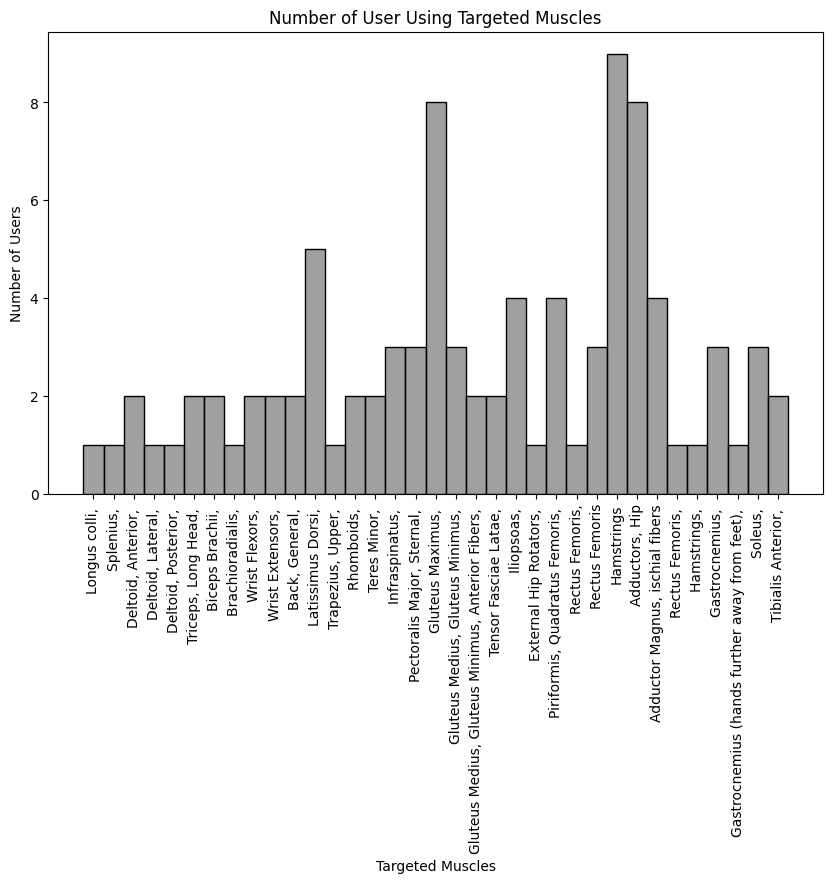

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Target_Muscles', color='Grey')
plt.title('Number of User Using Targeted Muscles')
plt.xlabel('Targeted Muscles')
plt.ylabel('Number of Users')
plt.xticks(rotation=90)
plt.show()

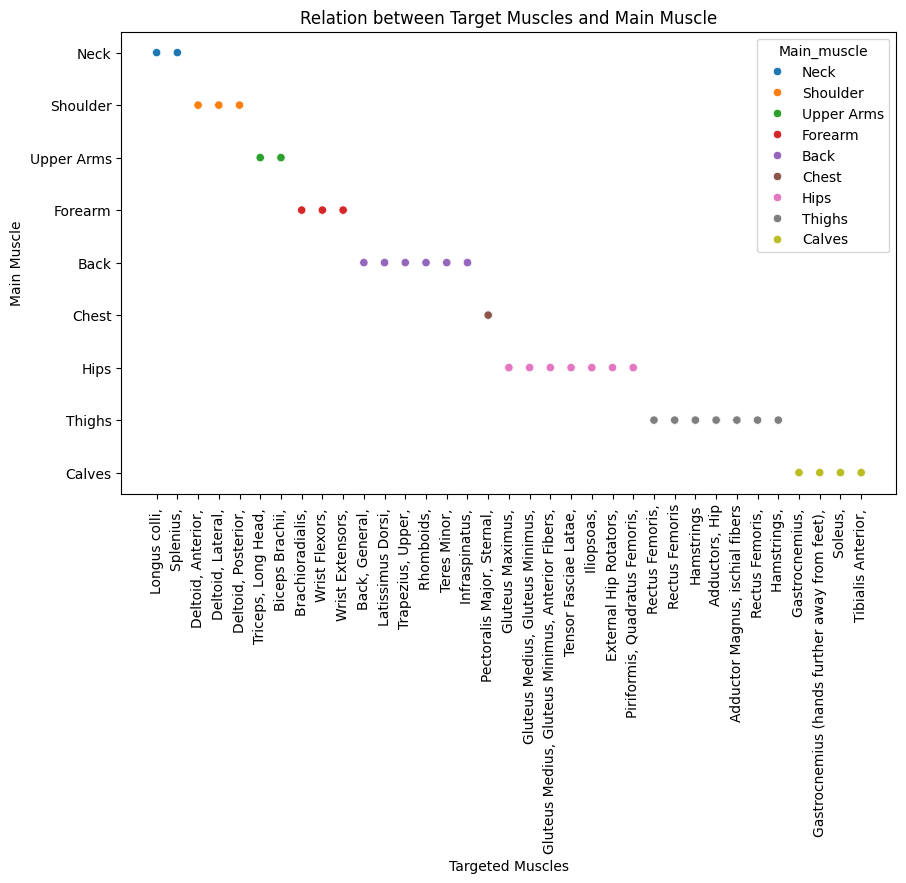

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Target_Muscles', y='Main_muscle', hue='Main_muscle')
plt.title("Relation between Target Muscles and Main Muscle")
plt.xlabel('Targeted Muscles')
plt.ylabel('Main Muscle')
plt.xticks(rotation=90)
plt.show()

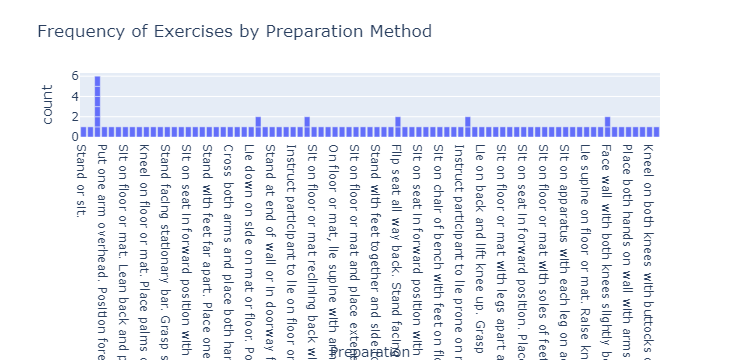

In [58]:
import plotly.express as px
fig = px.bar(data, x='Preparation', title='Frequency of Exercises by Preparation Method')
fig.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18964\3089789008.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



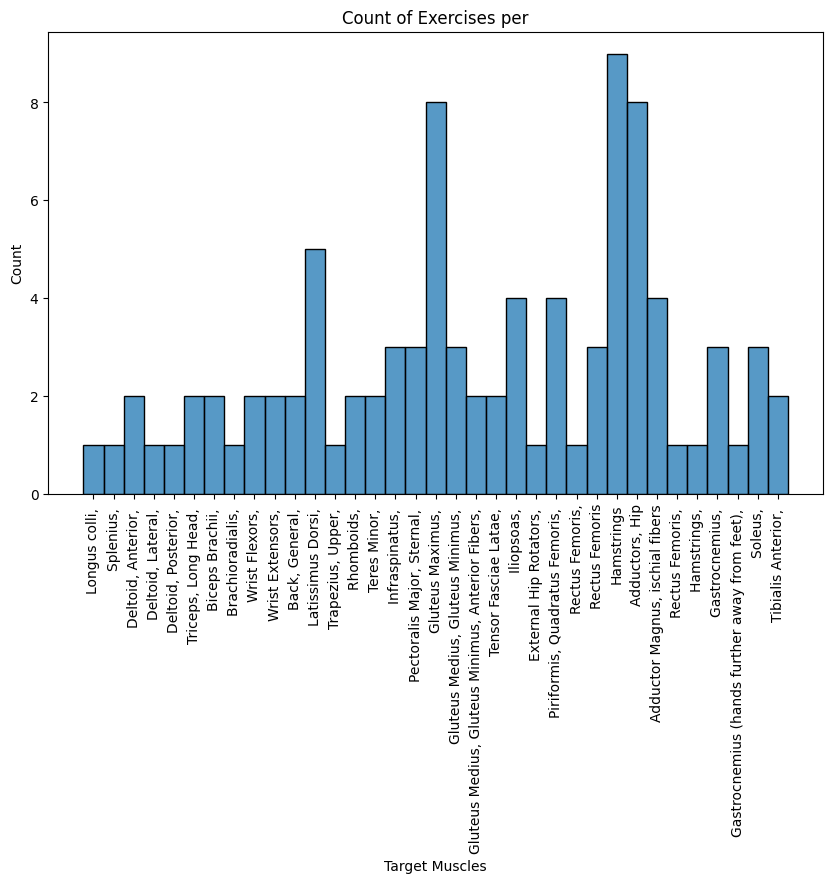

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Target_Muscles', palette='husl')
plt.title('Count of Exercises per')
plt.xlabel('Target Muscles')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

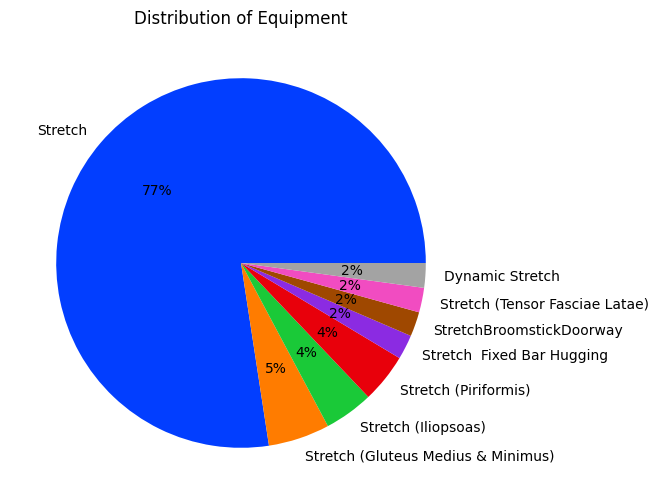

In [70]:
# Get counts of each category in the 'Equipment' column
equipment_counts = data['Equipment'].value_counts()

# Generate a color palette for the number of unique equipment types
pallete_color = sns.color_palette('bright', n_colors=len(equipment_counts))

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(equipment_counts, labels=equipment_counts.index, colors=pallete_color, autopct='%.0f%%')
plt.title('Distribution of Equipment')
plt.show()
